In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pykin.utils import plot_utils as p_utils
from pytamp.benchmark import Benchmark1
from pytamp.action.place import PlaceAction
%matplotlib inline

In [2]:
def linearplot_with_confidence(x_list, mean_list, std_list, label, marker="", color='r'):
    a = 0.1
    plt.fill_between(x_list, mean_list-a*std_list,mean_list+a*std_list, alpha=0.13, color=color)
    plt.plot(x_list,mean_list,label=label,marker=marker, ms=11, c=color, markevery=15)

In [3]:
def get_final_all_values(algo, budgets, n_seed, obj_num, flag = 2,  end_num=0):
    result_all_values = {}
    
    perturb_final_level_1_values = []
    perturb_final_level_2_values = []
    perturb_final_pnp_all_joint_paths = []
    perturb_final_pick_all_objects = []
    perturb_final_place_all_object_poses = []

    ###
    perturb_final_used_time = []
    perturb_final_visited_node_num = [] 


    c_list = []
    for seed in range(1, n_seed+1):
        filename = f'benchmark0_rearr_result/benchmark0_rearr_test_algo({algo})_budget({budgets})_seed({seed})_obj({obj_num})_flag({flag})_{end_num}.npy'
        with open(filename,'rb') as f:
            data_for_seed = np.load(f, allow_pickle=True)
            perturb_final_level_1_values.append(data_for_seed['level_1_values'])
            perturb_final_level_2_values.append(data_for_seed['level_2_values'])
            perturb_final_pnp_all_joint_paths.append(data_for_seed['pnp_all_joint_paths'])
            perturb_final_pick_all_objects.append(data_for_seed['pick_all_objects'])
            perturb_final_place_all_object_poses.append(data_for_seed['place_all_object_poses'])
            perturb_final_used_time.append(data_for_seed['final_used_time'])
            perturb_final_visited_node_num.append(data_for_seed['final_visited_node_num'])
            obj_num_ = data_for_seed['used_obj_num']
            c_list = data_for_seed['c']

    
    perturb_final_level_1_values = np.asarray(perturb_final_level_1_values)
    perturb_final_level_2_values = np.asarray(perturb_final_level_2_values)
    perturb_final_level_2_values[np.isinf(perturb_final_level_2_values)]=0.
    
    result_all_values["level_1_values"] = perturb_final_level_1_values
    result_all_values["level_2_values"] = perturb_final_level_2_values
    result_all_values["pnp_all_joint_paths"] = perturb_final_pnp_all_joint_paths
    result_all_values["pick_all_objects"] = perturb_final_pick_all_objects
    result_all_values["place_all_object_poses"] = perturb_final_place_all_object_poses
    result_all_values["used_time"] = perturb_final_used_time
    result_all_values["visted_node_num"] = perturb_final_visited_node_num
    result_all_values["c"] = c_list

    return result_all_values 

In [4]:
def plot_values(values, labels=None, title="test"):
    _, ax = p_utils.init_2d_figure(title)
    if labels.size > 1:
        for value, label in zip(values, labels):
            p_utils.plot_values(
                ax,
                value,
                label=str(label),
                title=title)  
    else:
        for label, value in enumerate(values):
            p_utils.plot_values(
                ax,
                value,
                label=str(label),
                title=title)
    # plt.ylim([np.min(values),np.max(values)])

In [5]:
def get_mean_std_values(result_all_values, level=1):
    if level == 1:
        key_name = "level_1_values"
    if level == 2:
        key_name = "level_2_values"
    mean_values = np.mean(result_all_values[key_name], axis=0)
    # mean_values = np.ma.masked_invalid(result_all_values[key_name]).mean(axis=0)
    std_values = np.std(result_all_values[key_name], axis=0)
    return mean_values, std_values

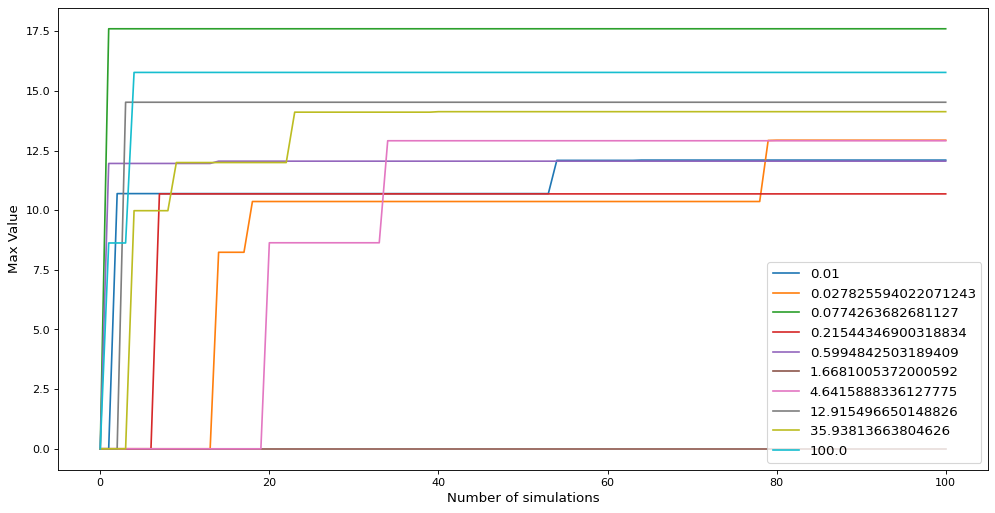

In [6]:
bai_perturb_result_all_values_flag_2 = get_final_all_values("bai_perturb", 100, 1 ,4, 2, 0)
perturb_mean_level_1_values_flag_2, perturb_std_level_1_values_flag_2 = get_mean_std_values(bai_perturb_result_all_values_flag_2, level=1)
perturb_mean_level_2_values_flag_2, perturb_std_level_2_values_flag_2 = get_mean_std_values(bai_perturb_result_all_values_flag_2, level=2)
# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values_flag_2['c'])
plot_values(perturb_mean_level_2_values_flag_2, labels=bai_perturb_result_all_values_flag_2['c'])

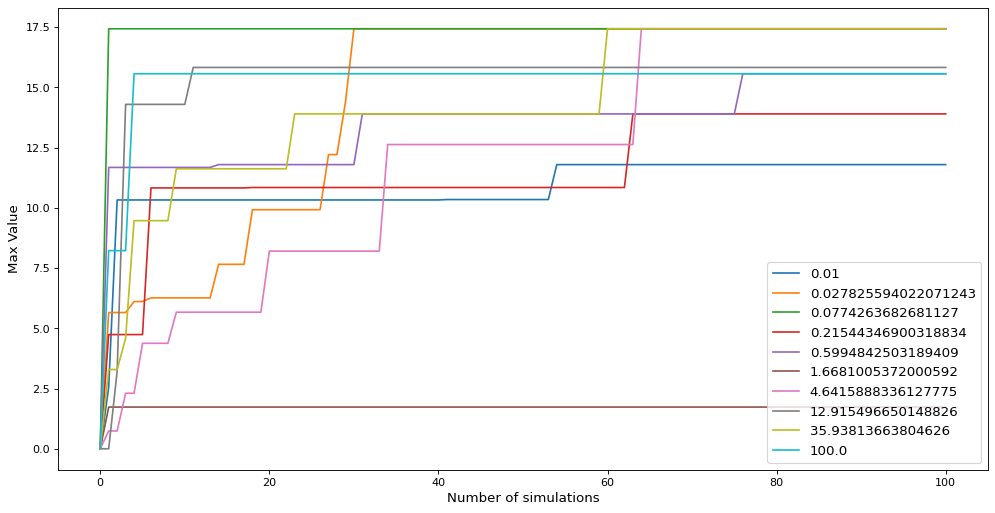

In [7]:
plot_values(perturb_mean_level_1_values_flag_2, labels=bai_perturb_result_all_values_flag_2['c'])

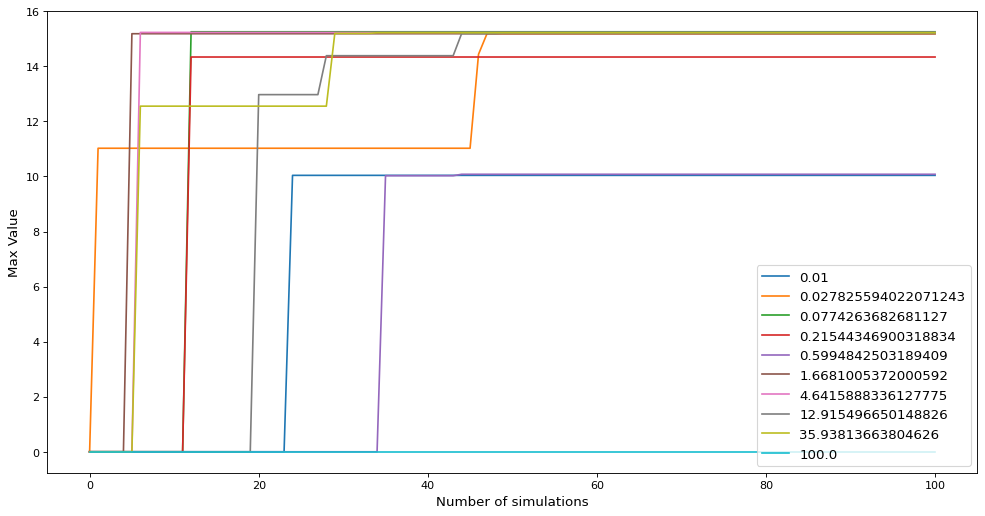

In [8]:
bai_perturb_result_all_values_flag_1 = get_final_all_values("bai_perturb", 100, 1 ,4, flag = 1, end_num = 0)
perturb_mean_level_1_values_flag_1, perturb_std_level_1_values_flag_1 = get_mean_std_values(bai_perturb_result_all_values_flag_1, level=1)
perturb_mean_level_2_values_flag_1, perturb_std_level_2_values_flag_1 = get_mean_std_values(bai_perturb_result_all_values_flag_1, level=2)
# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values_flag_1['c'])
plot_values(perturb_mean_level_2_values_flag_1, labels=bai_perturb_result_all_values_flag_1['c'])

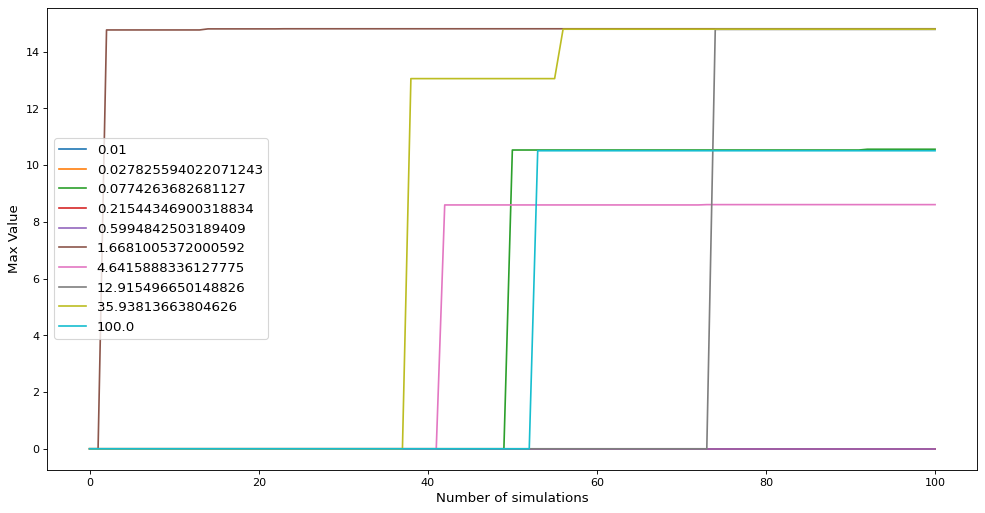

In [9]:
bai_perturb_result_all_values_flag_0 = get_final_all_values("bai_perturb", 100, 1 ,4, 0, 0)
perturb_mean_level_1_values_flag_0, perturb_std_level_1_values_flag_0 = get_mean_std_values(bai_perturb_result_all_values_flag_0, level=1)
perturb_mean_level_2_values_flag_0, perturb_std_level_2_values_flag_0 = get_mean_std_values(bai_perturb_result_all_values_flag_0, level=2)
# plot_values(perturb_mean_level_1_values, labels=bai_perturb_result_all_values_flag_0['c'])
plot_values(perturb_mean_level_2_values_flag_0, labels=bai_perturb_result_all_values_flag_0['c'])

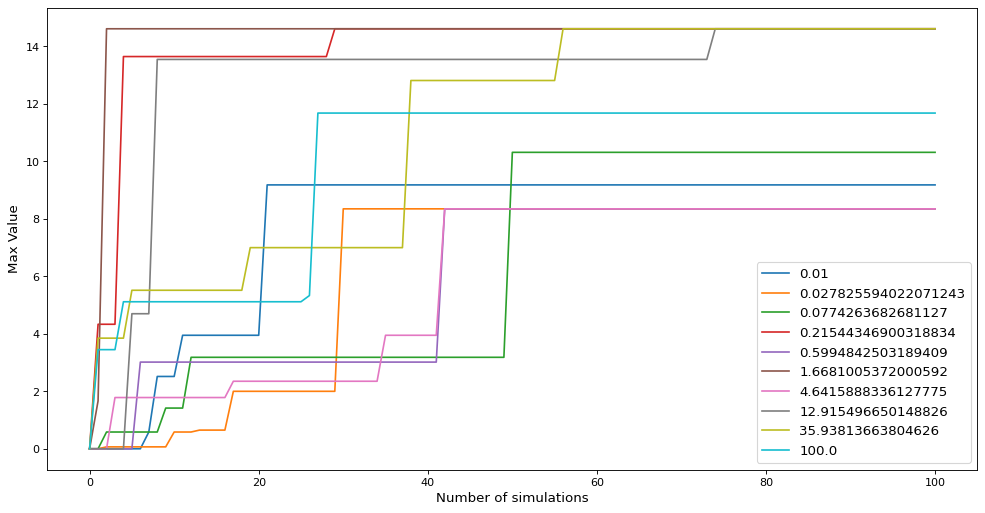

In [10]:
plot_values(perturb_mean_level_1_values_flag_0, labels=bai_perturb_result_all_values_flag_0['c'])

17.433333333333337
9.183333333333335
30


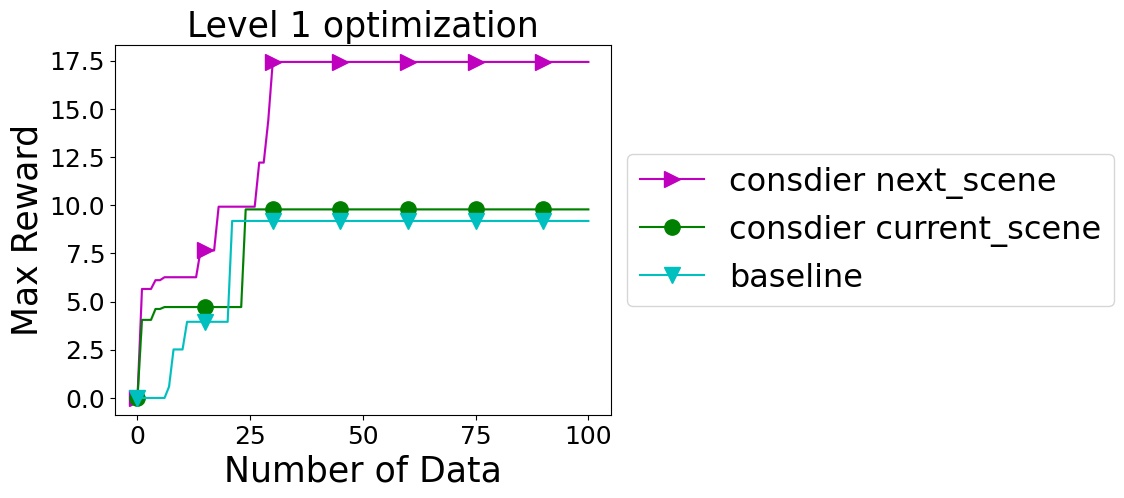

In [11]:
max_perturb_idx_flag_2 = np.argmax(perturb_mean_level_1_values_flag_2[:, -1])
perturb_level_1_flag_2_mean_list = perturb_mean_level_1_values_flag_2[max_perturb_idx_flag_2]
perturb_level_1_flag_2_std_list = perturb_std_level_1_values_flag_2[max_perturb_idx_flag_2]

max_perturb_idx_flag_1 = np.argmax(perturb_std_level_1_values_flag_1[:, -1])
perturb_level_1_flag_1_mean_list = perturb_mean_level_1_values_flag_1[max_perturb_idx_flag_1]
perturb_level_1_flag_1_std_list = perturb_std_level_1_values_flag_1[max_perturb_idx_flag_1]


max_perturb_idx_flag_0 = np.argmax(perturb_std_level_1_values_flag_0[:, -1])
perturb_level_1_flag_0_mean_list = perturb_mean_level_1_values_flag_0[max_perturb_idx_flag_0]
perturb_level_1_flag_0_std_list = perturb_std_level_1_values_flag_0[max_perturb_idx_flag_0]


# max_bai_ucb_idx = np.argmax(bai_ucb_mean_level_1_values[:, -1])
# bai_ucb_level_1_mean_list = bai_ucb_mean_level_1_values[max_bai_ucb_idx]
# bai_ucb_level_1_std_list = bai_ucb_std_level_1_values[max_bai_ucb_idx]

# max_random_idx = np.argmax(random_mean_level_1_values[:, -1])
# print(max_random_idx)
# random_level_1_mean_list = random_mean_level_1_values[max_random_idx]
# random_level_1_std_list = random_std_level_1_values[max_random_idx]

x_list = np.arange(len(perturb_level_1_flag_2_mean_list))

linearplot_with_confidence(x_list, perturb_level_1_flag_2_mean_list, perturb_level_1_flag_2_std_list, "consdier next_scene", ">", "m")
linearplot_with_confidence(x_list, perturb_level_1_flag_1_mean_list, perturb_level_1_flag_1_std_list, "consdier current_scene", "o", "g")
linearplot_with_confidence(x_list, perturb_level_1_flag_0_mean_list, perturb_level_1_flag_0_std_list, "baseline", "v", "c")
# linearplot_with_confidence(x_list, bai_ucb_level_1_mean_list, bai_ucb_level_1_std_list, "bai_ucb", "o", "g")
# linearplot_with_confidence(x_list, random_level_1_mean_list, random_level_1_std_list, "random", "^", "r")

print(perturb_mean_level_1_values_flag_2[max_perturb_idx_flag_2][-1])
print(perturb_mean_level_1_values_flag_0[max_perturb_idx_flag_0][-1])
# print(bai_ucb_mean_level_1_values[max_bai_ucb_idx][-1])
# print(random_mean_level_1_values[max_random_idx][-1])

print(np.argmax(perturb_level_1_flag_2_mean_list))
# print(np.argmax(bai_ucb_level_1_mean_list))

plt.title("Level 1 optimization", fontsize=25)
plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Max Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()

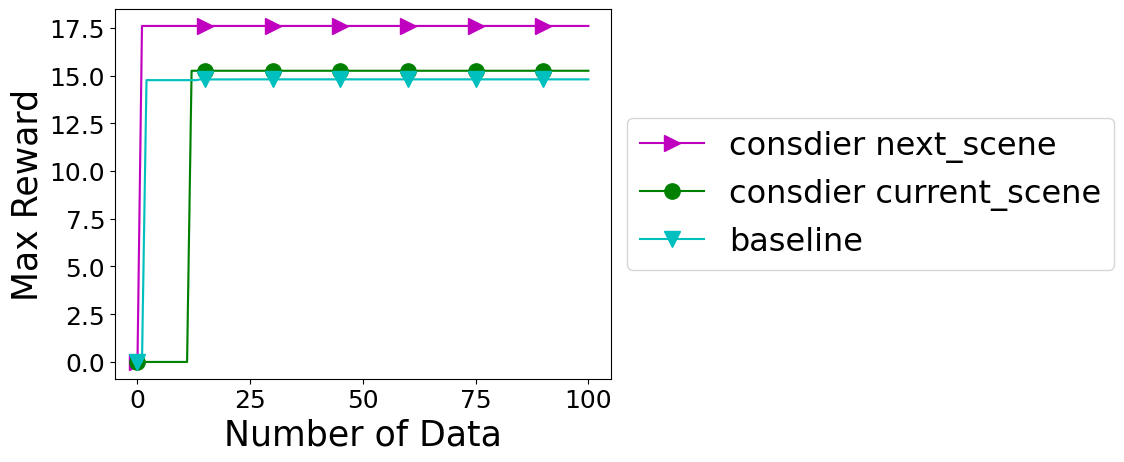

In [12]:
max_perturb_idx_flag_2 = np.argmax(perturb_mean_level_2_values_flag_2[:, -1])
perturb_level_2_flag_2_mean_list = perturb_mean_level_2_values_flag_2[max_perturb_idx_flag_2]
perturb_level_2_flag_2_std_list = perturb_std_level_2_values_flag_2[max_perturb_idx_flag_2]

max_perturb_idx_flag_1 = np.argmax(perturb_mean_level_2_values_flag_1[:, -1])
perturb_level_2_flag_1_mean_list = perturb_mean_level_2_values_flag_1[max_perturb_idx_flag_1]
perturb_level_2_flag_1_std_list = perturb_std_level_2_values_flag_1[max_perturb_idx_flag_1]

max_perturb_idx_flag_0 = np.argmax(perturb_mean_level_2_values_flag_0[:, -1])
perturb_level_2_flag_0_mean_list = perturb_mean_level_2_values_flag_0[max_perturb_idx_flag_0]
perturb_level_2_flag_0_std_list = perturb_std_level_2_values_flag_0[max_perturb_idx_flag_0]

# max_bai_ucb_idx = np.argmax(bai_ucb_mean_level_2_values[:, -1])
# bai_ucb_level_2_mean_list = bai_ucb_mean_level_2_values[max_bai_ucb_idx]
# bai_ucb_level_2_std_list = bai_ucb_std_level_2_values[max_bai_ucb_idx]

# max_random_idx = np.argmax(random_mean_level_2_values[:, -1])
# random_level_2_mean_list = random_mean_level_2_values[max_random_idx]
# random_level_2_std_list = random_std_level_2_values[max_random_idx]

x_list = np.arange(len(perturb_level_2_flag_2_mean_list))

linearplot_with_confidence(x_list, perturb_level_2_flag_2_mean_list, perturb_level_2_flag_2_std_list, "consdier next_scene", ">", "m")
linearplot_with_confidence(x_list, perturb_level_2_flag_1_mean_list, perturb_level_2_flag_1_std_list, "consdier current_scene", "o", "g")
linearplot_with_confidence(x_list, perturb_level_2_flag_0_mean_list, perturb_level_2_flag_0_std_list, "baseline", "v", "c")
# linearplot_with_confidence(x_list, bai_ucb_level_2_mean_list, bai_ucb_level_2_std_list, "bai_ucb", "o", "g")
# linearplot_with_confidence(x_list, random_level_2_mean_list, random_level_2_std_list, "random", "^", "r")

plt.xlabel("Number of Data",fontsize=25)
plt.ylabel("Max Reward",fontsize=25)

plt.xticks(x_list[::25],x_list[::25],fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 23})
plt.show()

# time consuming check 

In [14]:
bai_perturb_result_all_values_flag_2['used_time'], bai_perturb_result_all_values_flag_0['used_time']

([array([list([58.31090760231018, 54.973246812820435, 1012.9116291999817]),
         list([63.764153718948364, 42.50552201271057, 988.0990846157074]),
         list([65.0225293636322, 50.21059799194336, 1072.2239305973053]),
         list([62.412962198257446, 64.51241207122803, 1492.9584481716156]),
         list([64.96474957466125, 37.581398487091064, 1056.9987335205078]),
         list([]),
         list([64.96289467811584, 30.950958013534546, 764.1241900920868]),
         list([18.84037160873413, 17.9047749042511, 256.7381784915924]),
         list([67.61565709114075, 84.78027820587158, 2068.4234352111816]),
         list([16.01517105102539, 22.08775019645691, 696.436027765274])],
        dtype=object)],
 [array([list([]), list([]),
         list([76.84836888313293, 0, 154.7022385597229]), list([]),
         list([]), list([188.1360957622528, 0, 279.83724308013916]),
         list([168.6129400730133, 0, 186.884211063385]),
         list([194.5457901954651, 0, 187.69970035552979]),
 

In [27]:
def get_time_used_mean(used_time_data):
    level_1_time = 0 
    level_1_5_time = 0
    level_2_time = 0
    count = 0 
    for data in used_time_data:
        for i in data:
            if i:
                count += 1 
                level_1_time += i[0]
                level_1_5_time += i[1]
                level_2_time += i[2] 
    
    return level_1_time/count, level_1_5_time/count, level_2_time/count
        

In [30]:
pbai_used_time_flag_2 = get_time_used_mean(bai_perturb_result_all_values_flag_2['used_time'])
pbai_used_time_flag_1 = get_time_used_mean(bai_perturb_result_all_values_flag_1['used_time'])
pbai_used_time_flag_0 = get_time_used_mean(bai_perturb_result_all_values_flag_0['used_time'])



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [17]:
pbai_used_time_flag_2, pbai_used_time_flag_0

((53.54548854298062, 45.05632652176751, 1045.4348508516948),
 (170.9111746152242, 0.0, 180.53502782185873))

# Visited node count

In [18]:
bai_perturb_result_all_values_flag_2['visted_node_num']

[array([list([55]), list([71]), list([55]), list([65]), list([65]),
        list([]), list([71]), list([57]), list([107]), list([79])],
       dtype=object)]

In [19]:
bai_perturb_result_all_values_flag_0['visted_node_num']

[array([list([]), list([]), list([56]), list([]), list([]), list([90]),
        list([132]), list([115]), list([119]), list([83])], dtype=object)]

In [20]:
# bai_perturb_idx = np.unravel_index(bai_perturb_result_all_values['level_2_values'].argmax(), bai_perturb_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = bai_perturb_result_all_values['pnp_all_joint_paths'][bai_perturb_idx[0]][bai_perturb_idx[1]]
# pick_all_objects = bai_perturb_result_all_values['pick_all_objects'][bai_perturb_idx[0]][bai_perturb_idx[1]]
# place_all_object_poses = bai_perturb_result_all_values['place_all_object_poses'][bai_perturb_idx[0]][bai_perturb_idx[1]]

# uct_idx = np.unravel_index(uct_result_all_values['level_2_values'].argmax(), uct_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = uct_result_all_values['pnp_all_joint_paths'][uct_idx[0]][uct_idx[1]]
# pick_all_objects = uct_result_all_values['pick_all_objects'][uct_idx[0]][uct_idx[1]]
# place_all_object_poses = uct_result_all_values['place_all_object_poses'][uct_idx[0]][uct_idx[1]]

# bai_ucb_idx = np.unravel_index(bai_ucb_result_all_values['level_2_values'].argmax(), bai_ucb_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = bai_ucb_result_all_values['pnp_all_joint_paths'][bai_ucb_idx[0]][bai_ucb_idx[1]]
# pick_all_objects = bai_ucb_result_all_values['pick_all_objects'][bai_ucb_idx[0]][bai_ucb_idx[1]]
# place_all_object_poses = bai_ucb_result_all_values['place_all_object_poses'][bai_ucb_idx[0]][bai_ucb_idx[1]]

# random_idx = np.unravel_index(random_result_all_values['level_2_values'].argmax(), random_result_all_values['level_2_values'].shape)
# pnp_all_joint_path = random_result_all_values['pnp_all_joint_paths'][random_idx[0]][random_idx[1]]
# pick_all_objects = random_result_all_values['pick_all_objects'][random_idx[0]][random_idx[1]]
# place_all_object_poses = random_result_all_values['place_all_object_poses'][random_idx[0]][random_idx[1]]

# 사용 시간 측정 

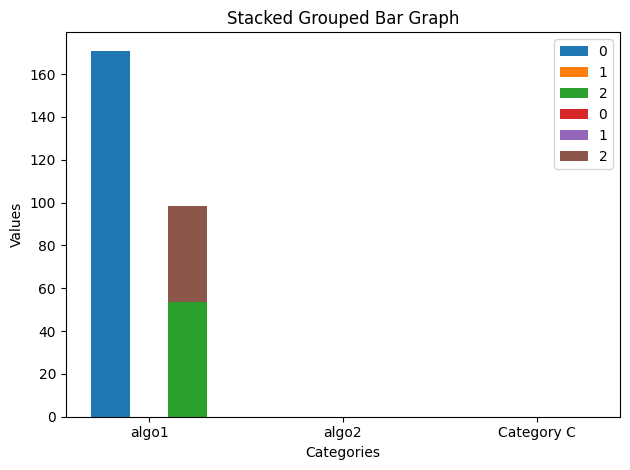

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
categories = ['algo1', 'algo2', 'Category C']
group_labels = ['0', '1' ,'2']  # 그룹 레이블

group_values_level_1 = [
    [pbai_used_time_flag_0[0], 0, 0 ],  # flag 0에 대한 알고리즘 별 level 1값 
    [0, 0, 0],  # flag 1에 대한 알고리즘 별 level 1값 
    [pbai_used_time_flag_2[0], 0, 0]   # flag 2에 대한 알고리즘 별 level 1값 
]
group_values_level_1_5 = [
    [pbai_used_time_flag_0[1], 0, 0],  # flag 0에 대한 알고리즘 별 level 1값 
    [0, 0, 0],  # flag 1에 대한 알고리즘 별 level 1값 
    [pbai_used_time_flag_2[1], 0, 0]   # flag 2에 대한 알고리즘 별 level 1값 
]

# 스택 쌓은 막대 그래프 그리기
bar_width = 0.2  # 막대 너비 설정
num_categories = len(categories)
x = np.arange(num_categories)  # x 축 위치 설정

fig, ax = plt.subplots()

bottom = np.zeros(num_categories)  # 막대 바닥 위치 초기화

for i, group_data in enumerate(group_values_level_1):
    ax.bar(x + i * bar_width, group_data, bar_width, label=group_labels[i])
    # bottom += group_data  # 다음 그룹의 막대 위치를 위해 현재 그룹 데이터를 더해줌

    # ax.bar(x + i * bar_width, group_values_level_1_5[i], bar_width, label=group_labels[i], bottom=bottom)

bottom += group_data  # 다음 그룹의 막대 위치를 위해 현재 그룹 데이터를 더해줌

for i, group_data in enumerate(group_values_level_1_5):
    ax.bar(x + i * bar_width, group_data, bar_width, label=group_labels[i], bottom=bottom)


ax.set_xticks(x + bar_width * (len(group_values_level_1) - 1) / 2)
ax.set_xticklabels(categories)
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Stacked Grouped Bar Graph')
ax.legend()

plt.tight_layout()
plt.show()